# **Web Scraping (Raspagem de Dados)**

## O que é?
Web Scraping é uma técnica de extração de dados valiosos de um site, através de um programa de computador ou de uma biblioteca.

## Por que utilizar a Web Scraping? Uso da API e do Web Scraping?
De forma simples, algumas empresas não permitem a consulta de seus dados de forma direta por API (Application Programming Interface), seja por questão de não ser viável financeiramente ou não desejarem que seu conteúdo exclusivo seja baixado e re-utilizado para fins não autorizados.

O script ou ferramenta automatizada para realizar a raspagem é preciso:
*   Conectar com site desejado.
*   Identificar as páginas desejadas.
*   Visitar a página desejada e localizar os dados relevantes.
*   Extrair-los do DOM.
*   Transformar em um formato mais útil, como: csv, JSON.

Sites para treinar web scraping:
*   https://toscrape.com/
*   https://www.scrapethissite.com/



Para usar uma API, é preciso:
*   Especificar um endereço (endpoint) da API, métodos (method), cabeçalho (header) e parâmetros de pesquisa em um cliente HTTP.
*   Instruir o cliente a fazer uma chamada para a API.
*   Receber os dados desejados em um formato semi-estruturado, como: JSON ou XML.

Exemplo de API: https://brasilapi.com.br/api/cep/v1/{CEP}

# Intruduçao ao HTML
HTML não é uma linguagem de programação; é uma linguagem de marcação, usada para definir a estrutura do seu conteúdo. HTML consiste de uma série de elementos, que você usa para delimitar ou agrupar diferentes partes do conteúdo para que ele apareça ou atue de determinada maneira. As tags anexas podem transformar uma palavra ou imagem num hiperlink, pode colocar palavras em itálico, pode aumentar ou diminuir a fonte e assim por diante. O DOM (Document Object Model) representa o mesmo documento para que possa ser manipulado. O DOM é uma representação orientada a objetos da página da web, que pode ser modificada com uma linguagem de script como JavaScript. (MDN Web Docs)

Anatomia básica do HTML:



In [ ]:
%%html
<!doctype html>
<html>
  <head>
    <meta charset="utf-8" />
    <meta name="viewport" content="width=device-width" />
    <title>Minha página de teste</title>
  </head>
  <body>
    <p id="paragrafo_id" class="paragrafo_class">Meu primeiro paragrafo!</p>
  </body>
</html>

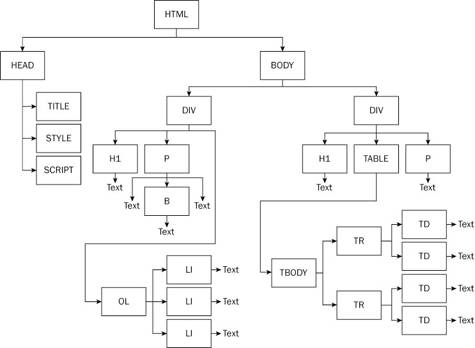



---

# **Primeiro projeto de web scraping**
Vamos utilizar:
*   A biblioteca "Requests" (https://requests.readthedocs.io/en/latest/)
*   A biblioteca "BeatifulSoup4" (https://beautiful-soup-4.readthedocs.io/en/latest/)



In [ ]:
# pip install requests # Se quiser usar o VS Code é preciso instalar na máquina, aqui no colab não precisa
import requests

URL = "https://books.toscrape.com/"
page = requests.get(URL)

# Para demonstração mostro todo o conteúdo HTML da página
print(page.text)

In [ ]:
# pip install beautifulsoup4 # Se quiser usar o VS Code é preciso instalar na máquina, aqui no colab não precisa
from bs4 import BeautifulSoup

# Atribuímos a variável URL, o site que queremos fazer a raspagem
URL = "https://books.toscrape.com/"
# 'pegamos' toda a página HTML e atribuímos na variavel page
page = requests.get(URL)

# Aqui passamos a página para o BeautifulSoup e atribuímos na variável soup,
# assim temos acesso ao métodos/funções que o beautifulsoup nos fornece
soup = BeautifulSoup(page.content, "html.parser")

# aqui (com o método find_all) pegamos todas as TAGs img (<img ...>) do site
# e ele nos devolve um array de TAGs img que é atribuída na variável images
images = soup.find_all("img")
# No python temos a função print() que nos ajuda a visualizar os dados
print(images)

print()
# Se quiser mostrar somente a primeira TAG img do array
# (lembrando que: o primeiro item do array começa do 0)
print(images[0])
# 'Pego' o atributo "alt" da TAG img do primeiro item
print(images[0]["alt"])
# Só para demonstração monto a URL completa apontando para a imagem
# nesse caso 'pego' o valor do atributo "src" (que é o caminho do arquivo)
# do primeiro item do array
print(f'https://books.toscrape.com/{images[0]["src"]}')


[<img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>, <img alt="Tipping the Velvet" class="thumbnail" src="media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg"/>, <img alt="Soumission" class="thumbnail" src="media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg"/>, <img alt="Sharp Objects" class="thumbnail" src="media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg"/>, <img alt="Sapiens: A Brief History of Humankind" class="thumbnail" src="media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg"/>, <img alt="The Requiem Red" class="thumbnail" src="media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg"/>, <img alt="The Dirty Little Secrets of Getting Your Dream Job" class="thumbnail" src="media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg"/>, <img alt="The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull" class="thumbnail" src="media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg"/

In [ ]:
# Percorro todo o array contendo as TAGs img
for image in images:
  # Verifico se a TAG contém o atributo "alt"
  if "alt" in image.attrs:
    # Se tem mostro o conteúdo do atributo
    print(image["alt"])
  # Para cada item do array mostro o caminho até a imagem
  print(f'https://books.toscrape.com/{image["src"]}')

A Light in the Attic
https://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg
Tipping the Velvet
https://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg
Soumission
https://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg
Sharp Objects
https://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg
Sapiens: A Brief History of Humankind
https://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg
The Requiem Red
https://books.toscrape.com/media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg
The Dirty Little Secrets of Getting Your Dream Job
https://books.toscrape.com/media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
https://books.toscrape.com/media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin 

# Desafio 1

Usando o site: https://transparenciainternacional.org.br/ipc/


1.   Busque e mostre (Print) todo o conteudo da tabela, nesse caso só temos 1 tabela
2.   Guarde em um dicionário (Python: dict), o nome do país e a pontução
3.   Mostre a posição, os nomes dos países e sua respectiva pontução
4.   Mostre a posição do Brasil, Italia e Japão



# Desafio 2

No site: https://pt.wikipedia.org/wiki/Organiza%C3%A7%C3%A3o_para_a_Coopera%C3%A7%C3%A3o_e_Desenvolvimento_Econ%C3%B4mico

1 - Buscar a prinmeira tabela dos países membros do OCDE e listar os países e respectivos IDHs.

2 - Listar somente os países que estão no Quartil superior-médio, Quartil médio-baixo e Quartil baixo da coluna: desigualdade.